In [110]:
import pandas
import array as arr
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing, linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [111]:
#dataset loading
filename = 'C:\\notes\datasets\graduate-admissions\Admission_predict_ver1.1.csv'
data = pandas.read_csv(filename)
print(data.shape)

(500, 9)


In [112]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


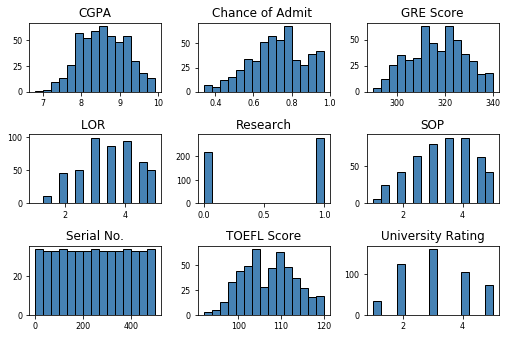

In [113]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

In [114]:
#division oF dataset into x and y
X=data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
Y=data[['Chance of Admit ']]
Y=Y.values
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [115]:
#using min-max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
X1 = min_max_scaler.fit_transform((X[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]))
E = np.ones([500,1])
X1 = np.concatenate((E,X1), axis=1)
print ("\nscaled : \n",  X1) 


scaled : 
 [[1.         0.94       0.92857143 ... 0.875      0.91346154 1.        ]
 [1.         0.68       0.53571429 ... 0.875      0.66346154 1.        ]
 [1.         0.52       0.42857143 ... 0.625      0.38461538 1.        ]
 ...
 [1.         0.8        1.         ... 1.         0.88461538 1.        ]
 [1.         0.44       0.39285714 ... 1.         0.5224359  0.        ]
 [1.         0.74       0.75       ... 0.875      0.71794872 0.        ]]


C:\Users\Manvi Jain\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [116]:
#divsion of dataset
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(400, 8) (400, 1)
(100, 8) (100, 1)


In [117]:
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [[0.         0.07673389 0.08975819 0.01706354 0.01091028 0.06800848
  0.37322254 0.02840277]]


In [118]:
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(x_test, y_test))) 

Variance score: 0.8559063298137808


In [126]:
alpha=0.01
theta=np.zeros([1,8])
def cost_function1(X, Y, theta):
    m = len(Y)
    X_pow=np.zeros(X.shape)
    for i in range(len(X)):
        for j in range(8):#using polynomial hypothesis
            X_pow[i][j]=X[i][j]**j
    a = np.dot(X_pow,theta.T) - Y
    j=0
    for i in range(m):
        j=j+a[i]**2
    J=j/(2*m)
    return J

In [127]:
inital_cost = cost_function1(x_train, y_train, theta)
print(inital_cost)

[0.2723595]


In [128]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        X_pow=np.zeros(X.shape)
        for i in range(len(X)):
            for j in range(8):#using polynomial hypothesis
                X_pow[i][j]=X[i][j]**j
        h = np.dot(X_pow,theta.T)
        # Difference b/w predicted and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient =  X.T.dot(loss) / m
        # Changing Values of B using Gradient
        theta = theta - alpha * gradient.T
        # New Cost Value
        cost = cost_function1(X, Y, theta)
        cost_history[iteration] = cost
        
    return theta, cost_history

In [129]:
#computing values
iteration=1000
theta_final, cost_history = gradient_descent(x_train, y_train, theta, alpha,iteration)
#theta_final.shape=1,8

# New Values of theta
print(theta_final)

# Final Cost of theta_final
print(cost_history[-1])

[[0.47249128 0.13104145 0.14396057 0.06519543 0.13125094 0.15546085
  0.17815218 0.0293375 ]]
[0.00447615]


In [130]:
def rmse(Y_test, Y_pred):
    s=0
    for i in range(len(Y_test)):
        s=s+(Y_test[i] - Y_pred[i]) ** 2
    rmse = np.sqrt(s/ len(Y_test))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y_test, Y_pred):
    mean_y = np.mean(Y)
    ss_tot =0
    ss_res =0
    for i in range(len(Y_test)):
        ss_tot = (Y_test[i] - mean_y) ** 2
        ss_res = (Y_test[i] - Y_pred[i]) ** 2
    r2 = 1 - (ss_res / ss_tot)
    return r2

X_pow=np.zeros(x_test.shape)
for i in range(len(x_test)):
        for j in range(8):#using polynomial hypothesis
            X_pow[i][j]=x_test[i][j]**j
Y_pred = np.dot(X_pow,theta.T) 

print(rmse(y_test, Y_pred))
print(r2_score(y_test, Y_pred))

[0.72461783]
[-13.11073227]
